In [203]:
import numpy as np 
import pandas as pd
import warnings

In [204]:
warnings.filterwarnings('ignore')

# Importing Dataset

In [205]:
col_names = ['user_id','item_id','rating','timestamp']

In [206]:
df = pd.read_csv('ml-100k/u.data',names=col_names,sep='\t')
movies_titles = pd.read_csv('ml-100k/u.item',sep='|',header = None)

In [207]:
print(df.shape)
df.head()

(100000, 4)


,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [208]:
df.user_id.nunique(),df.item_id.nunique()


(943, 1682)

In [209]:
 movies_titles = movies_titles.iloc[:,:2]

In [210]:
movies_titles.columns = ['item_id','title']

In [211]:
movies_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [212]:
df = pd.merge(df,movies_titles,on="item_id")

In [213]:
df.tail()

,user_id,item_id,rating,timestamp,title
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."
99999,655,1641,3,887427810,Dadetown (1995)


# EDA

In [214]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

In [215]:
df.groupby('title').mean().rating.sort_values(ascending = False)

title
They Made Me a Criminal (1939)                  5.0
Marlene Dietrich: Shadow and Light (1996)       5.0
Saint of Fort Washington, The (1993)            5.0
Someone Else's America (1995)                   5.0
Star Kid (1997)                                 5.0
                                               ... 
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
King of New York (1990)                         1.0
Touki Bouki (Journey of the Hyena) (1973)       1.0
Bloody Child, The (1996)                        1.0
Crude Oasis, The (1995)                         1.0
Name: rating, Length: 1664, dtype: float64

In [216]:
df.groupby('title').count().rating.sort_values(ascending = False)

title
Star Wars (1977)                      583
Contact (1997)                        509
Fargo (1996)                          508
Return of the Jedi (1983)             507
Liar Liar (1997)                      485
                                     ... 
Great Day in Harlem, A (1994)           1
Other Voices, Other Rooms (1997)        1
Good Morning (1971)                     1
Girls Town (1996)                       1
� k�ldum klaka (Cold Fever) (1994)      1
Name: rating, Length: 1664, dtype: int64

In [217]:
ratings = pd.DataFrame(df.groupby('title').mean().rating)
ratings["num of ratings"] = df.groupby('title').count().rating

In [218]:
ratings.sort_values(by='rating',ascending=False)

,rating,num of ratings
title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
...,...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0,1
King of New York (1990),1.0,1
Touki Bouki (Journey of the Hyena) (1973),1.0,1


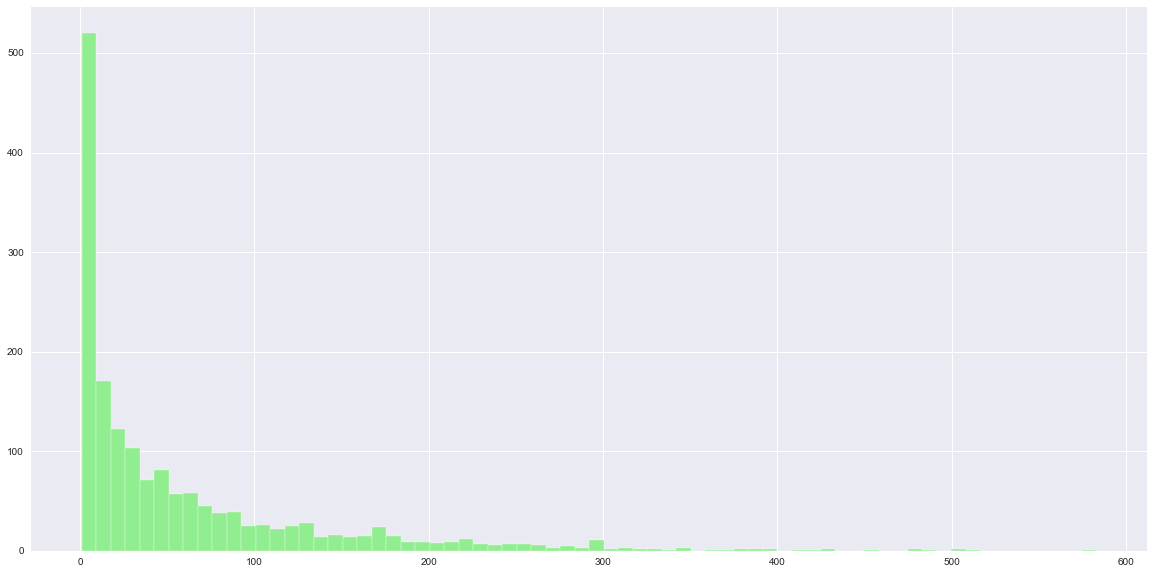

In [219]:
plt.figure(figsize=(20,10))
plt.style.use('seaborn')
plt.hist(ratings['num of ratings'],bins=70 ,color="lightgreen")
plt.show()

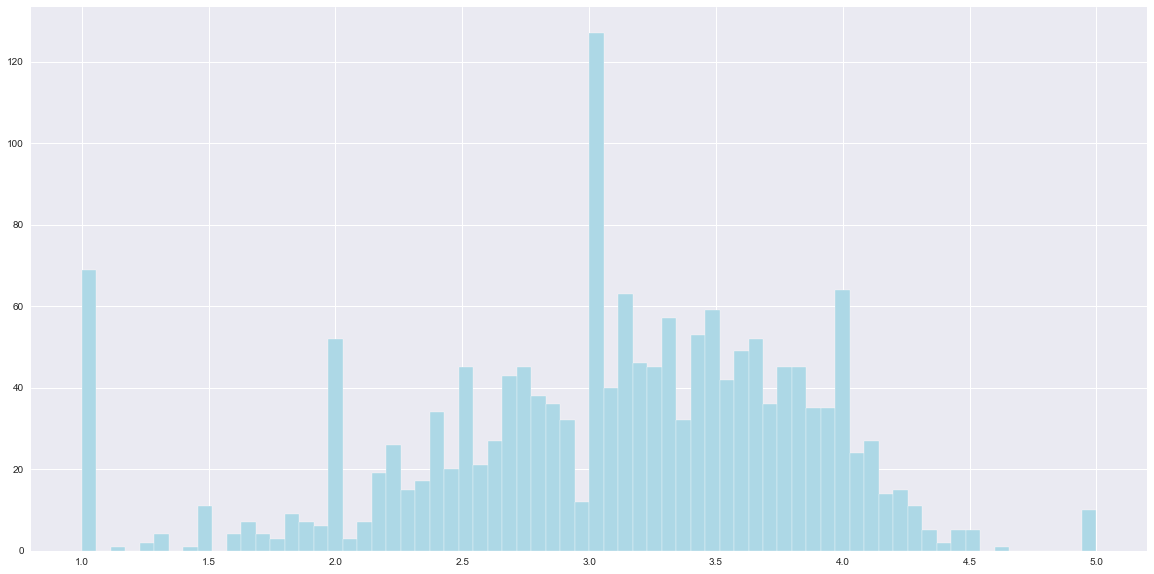

In [220]:
plt.figure(figsize=(20,10))
plt.style.use('seaborn')
plt.hist(ratings['rating'],bins=70 ,color="lightblue")
plt.show()

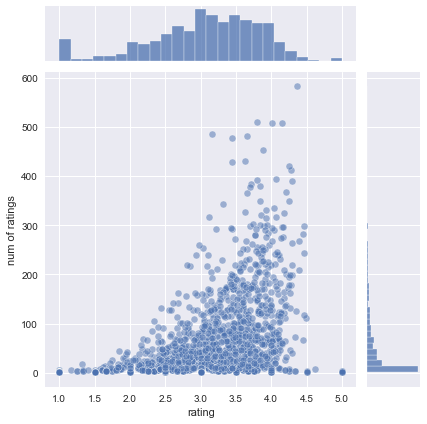

In [221]:
sns.jointplot(x="rating",y="num of ratings",data=ratings ,alpha=0.5)

# CREATING RECOMMENDATION

In [222]:
df.head()

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [223]:
movie_mat =  df.pivot_table(index = "user_id" , columns= "title" , values="rating")

In [224]:
movie_mat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,� k�ldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [225]:
star_wars_rating = movie_mat['Star Wars (1977)']
star_wars_rating.head()

user_id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

In [226]:
corr_starwars = pd.DataFrame(movie_mat.corrwith(star_wars_rating),columns=["Correlation"])

In [227]:
print(corr_starwars.shape)
corr_starwars.head()

(1664, 1)


,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [228]:
corr_starwars.dropna(inplace=True)
corr_starwars.shape

(1410, 1)

In [229]:
corr_starwars.sort_values(by="Correlation",ascending=False)

,Correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
...,...
Roseanna's Grave (For Roseanna) (1997),-1.0
For Ever Mozart (1996),-1.0
American Dream (1990),-1.0


In [230]:
corr_starwars=corr_starwars.join(ratings["num of ratings"])

In [232]:
corr_starwars.head()

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [235]:
corr_starwars[corr_starwars["num of ratings"]>100].sort_values(by="Correlation",ascending=False).head()

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


# Predict

In [238]:
def predict_movies(movie_name):
    movie_user_ratings= movie_mat[movie_name]
    similar = movie_mat.corrwith(movie_user_ratings)
    
    corr_movie = pd.DataFrame(similar,columns=["Correlation"])
    corr_movie.dropna(inplace=True)
    
    corr_movie = corr_movie.join(ratings['num of ratings'])
    predictions = corr_movie[corr_movie["num of ratings"]>100].sort_values('Correlation',ascending=False)
    return predictions

In [247]:
predictions = predict_movies("Star Wars (1977)")

In [248]:
predictions.head()

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [253]:
predictions = predict_movies("Contact (1997)")

In [254]:
predictions.head()

,Correlation,num of ratings
title,,
Contact (1997),1.000000,509
Philadelphia (1993),0.446509,137
"Mask, The (1994)",0.418328,129
Young Guns (1988),0.388839,101
Sling Blade (1996),0.384840,136
